<a href="https://colab.research.google.com/github/PSURI1894/EDA_22BDS0116/blob/main/22BDS0116.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset from URL
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/SuicideChina.csv"
df = pd.read_csv(url)

# Preview data
df.head()


,rownames,Person_ID,Hospitalised,Died,Urban,Year,Month,Sex,Age,Education,Occupation,method
0,1,1,yes,no,no,2010,12,female,39,Secondary,household,Other poison
1,2,2,no,yes,no,2009,3,male,83,primary,farming,Hanging
2,3,3,no,yes,no,2010,2,male,60,primary,farming,Hanging
3,4,4,no,yes,no,2011,1,male,73,primary,farming,Hanging
4,5,5,yes,no,no,2009,8,male,51,Secondary,farming,Pesticide


In [2]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Columns
print("\nColumn Names:\n", df.columns.tolist())

# Data Types
print("\nData Types:\n", df.dtypes)

Dataset Shape: (2571, 12)

Column Names:
 ['rownames', 'Person_ID', 'Hospitalised', 'Died', 'Urban', 'Year', 'Month', 'Sex', 'Age', 'Education', 'Occupation', 'method']

Data Types:
 rownames         int64
Person_ID        int64
Hospitalised    object
Died            object
Urban           object
Year             int64
Month            int64
Sex             object
Age              int64
Education       object
Occupation      object
method          object
dtype: object


In [3]:
# Numeric summary
df.describe()

# Categorical summary
df.describe(include='object')


,Hospitalised,Died,Urban,Sex,Education,Occupation,method
count,2571,2571,2571,2571,2571,2571,2571
unique,2,2,3,2,5,10,9
top,yes,no,no,female,Secondary,farming,Pesticide
freq,1553,1315,2213,1328,1280,2032,1768


In [4]:
# Missing values
print(df.isnull().sum())

# Check for duplicates
print("Duplicate Rows:", df.duplicated().sum())


rownames        0
Person_ID       0
Hospitalised    0
Died            0
Urban           0
Year            0
Month           0
Sex             0
Age             0
Education       0
Occupation      0
method          0
dtype: int64
Duplicate Rows: 0


In [5]:
# Remove duplicates
df = df.drop_duplicates()

# Example: Convert 'Year' and 'Month' to string
df['Year'] = df['Year'].astype(str)
df['Month'] = df['Month'].astype(str)


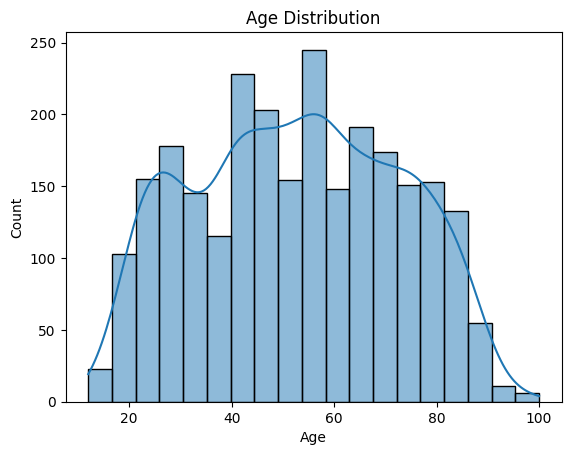

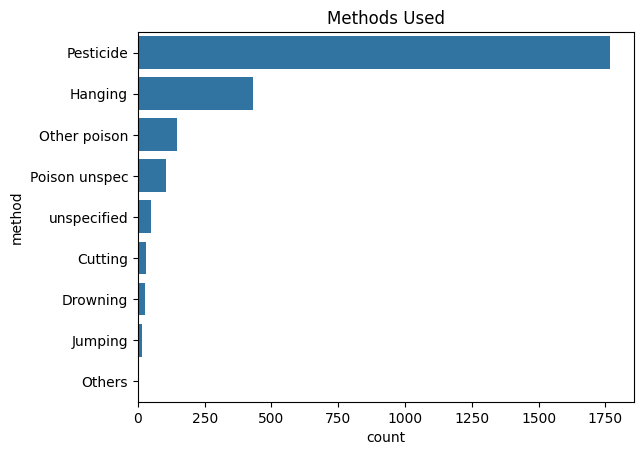

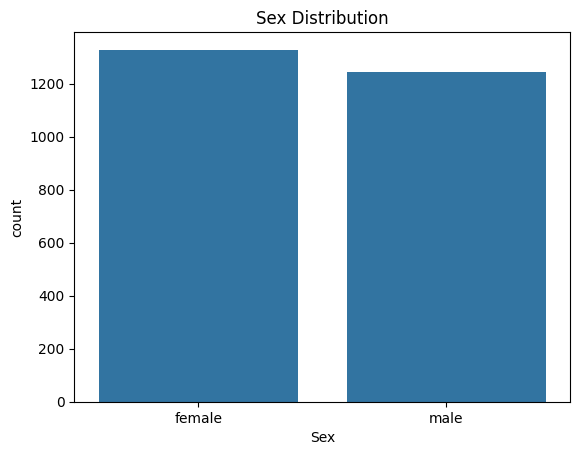

In [8]:
#Univariate Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Age Distribution
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

# Method Count
sns.countplot(data=df, y='method', order=df['method'].value_counts().index)
plt.title("Methods Used")
plt.show()

# Sex Distribution
sns.countplot(data=df, x='Sex')
plt.title("Sex Distribution")
plt.show()


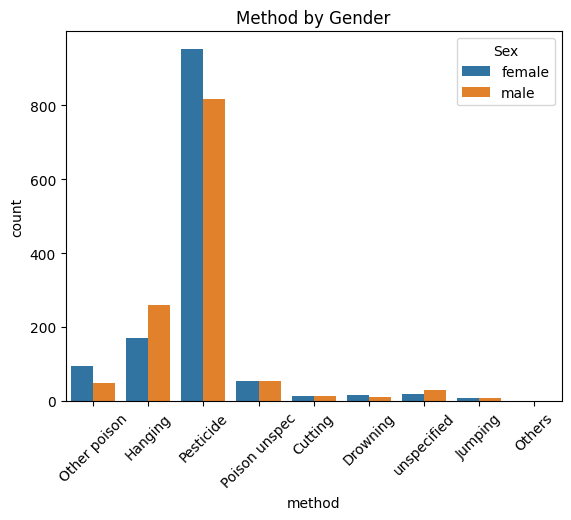

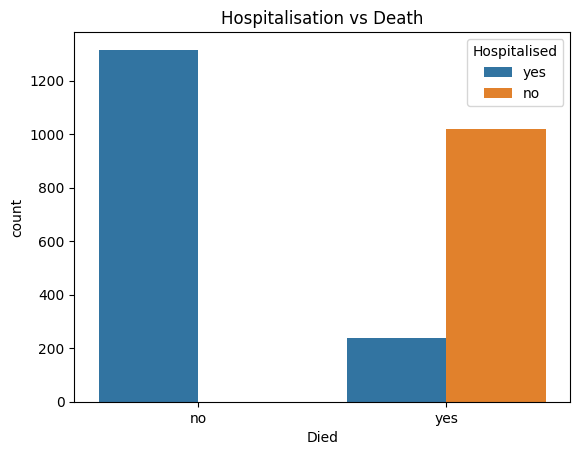

In [10]:
# Bivariate Analysis
# Method vs Sex
sns.countplot(data=df, x='method', hue='Sex')
plt.xticks(rotation=45)
plt.title("Method by Gender")
plt.show()

# Hospitalised vs Died
sns.countplot(data=df, hue='Hospitalised', x='Died')
plt.title("Hospitalisation vs Death")
plt.show()


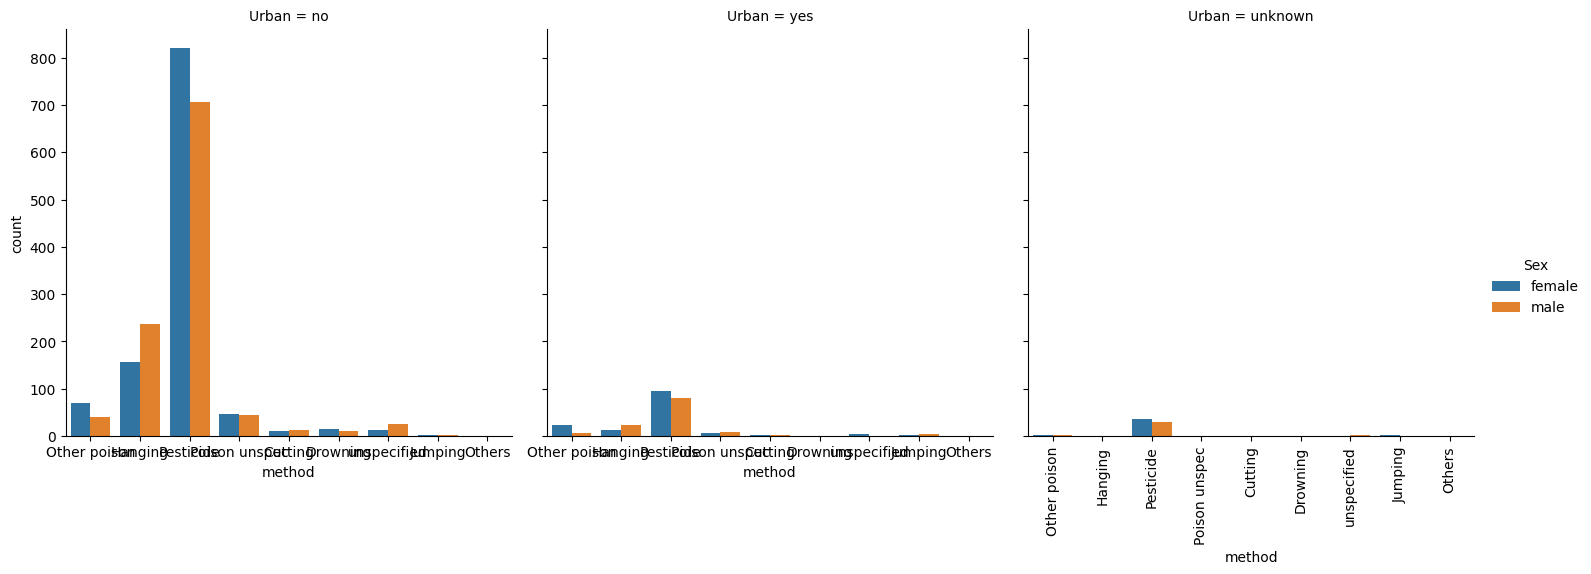

In [12]:
#Multivariate Analysis

# Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 80, 100],
                        labels=['<18','18-35','36-50','51-65','66-80','80+'])

# Multivariate: Method vs Sex vs Urban
sns.catplot(data=df, x='method', hue='Sex', col='Urban', kind='count', height=5, aspect=1)
plt.xticks(rotation=90)
plt.show()
